In [1]:
import braingeneers.analysis
#import numpy as np
import pandas as pd
import braingeneers.utils.smart_open_braingeneers as smart_open
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import os
import braingeneers as bg
import argparse

In [16]:
bg.set_default_endpoint('/Users/jesusgf/Desktop/ephys_autoencoder/1d-constrastive-autoencoder/unlabeled_data_templates/')

In [17]:
phy = braingeneers.analysis.load_spike_data(uuid = "2024-02-15-e-JLS-auto-kolf-20274")
trains = phy.train
all_isi = phy.interspike_intervals()

Multiple zip files found. Using the first one.


In [18]:
len(all_isi)

205

In [6]:
all_isi

[array([1.1193000e+03, 3.4112550e+04, 1.1941495e+05, 1.9090000e+02,
        3.8550000e+01, 7.6150000e+01, 2.3350000e+01, 1.6500000e+01,
        4.1500000e+00, 5.0850000e+01, 8.4350000e+01, 2.5200000e+01,
        9.3900000e+01, 4.5500000e+00, 8.0000000e-01, 7.9900000e+01,
        1.0155000e+02, 3.0750000e+01, 9.7000000e+00, 9.0000000e-01,
        4.2050000e+01, 6.3500000e+00, 5.9500000e+00, 2.1550000e+01,
        2.1450000e+01, 6.4950000e+01, 2.7200000e+01, 1.4100000e+01,
        5.8700000e+01, 1.6650000e+01, 5.3950000e+01, 7.6500000e+00,
        2.9900000e+01, 1.5900000e+01, 4.7550000e+01, 2.0450000e+01,
        7.6500000e+00, 2.7900000e+01, 1.0000000e+01, 2.0300000e+01,
        1.6500000e+01, 2.5950000e+01, 6.6500000e+00, 2.2250000e+01,
        2.9250000e+01, 6.8000000e+00, 4.4000000e+00, 5.0100000e+01,
        7.2650000e+01, 4.6500000e+00, 2.6750000e+01, 2.8300000e+01,
        1.2750000e+01, 6.9350000e+01, 9.2450000e+01, 4.1650000e+01,
        3.0650000e+01, 7.3100000e+01, 3.5000000e

In [19]:
isi_dist = []
bad_indices = []
for idx, isi in enumerate(all_isi):
    hist, _ = np.histogram(isi[isi < 150], bins=64, density=True)
    if not np.isnan(hist).all():
        isi_dist.append(hist)
    else:
        bad_indices.append(idx)

In [20]:
isi_dist[0]

array([0.03097204, 0.02507261, 0.02359775, 0.02212289, 0.01327373,
       0.01843574, 0.02359775, 0.01769831, 0.01327373, 0.01106144,
       0.02212289, 0.01548602, 0.00811173, 0.01032401, 0.00811173,
       0.0073743 , 0.0073743 , 0.0073743 , 0.0073743 , 0.01106144,
       0.00811173, 0.00811173, 0.00516201, 0.00294972, 0.00368715,
       0.00811173, 0.00516201, 0.00442458, 0.00442458, 0.0073743 ,
       0.00221229, 0.00442458, 0.00221229, 0.00516201, 0.00442458,
       0.00294972, 0.00516201, 0.00147486, 0.00147486, 0.00147486,
       0.00221229, 0.00368715, 0.00221229, 0.00294972, 0.00073743,
       0.00073743, 0.00368715, 0.00294972, 0.00073743, 0.00073743,
       0.00368715, 0.00073743, 0.00073743, 0.00147486, 0.00147486,
       0.00147486, 0.00147486, 0.00147486, 0.        , 0.00368715,
       0.        , 0.        , 0.00221229, 0.00147486])

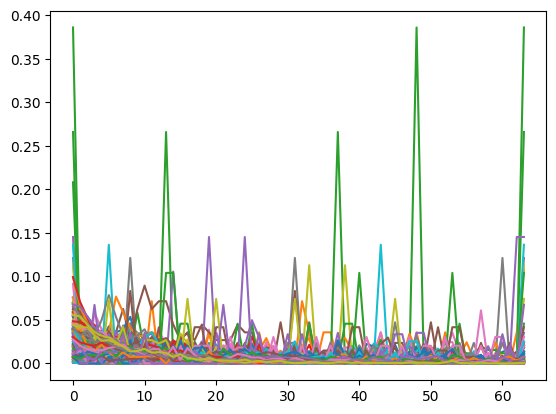

In [22]:

for i in range(0,len(isi_dist)):
    #if there is any value bigger than 1, then plot it
    if np.any(isi_dist[i] > 1):
        continue
    else:
        plt.plot(isi_dist[i])